# 55-700241 Applicable Artificial Intelligence (More data cleaning)
1.	Outline of the Task
The objective of the coursework is to design, implement and evaluate a Neural Network for data classification and write a report on it. The neural network is to be developed using Matlab.

2.	The data
A subset of the Heart Disease (Cleveland) data set is provided via Blackboard (file named cleveland_heart_disease_dataset_labelled.mat). The data has the following properties:
•	This is a cleaned up subset of 14 features from a full set of 75,
•	It contains multiple classes (0: no heart disease, 1: mild heart disease, 2: severe heart disease),
•	The majority of experiments in the literature focus on detecting presence (1 or 2) from absence (0),
•	Current state of the art is around 90% accuracy.

The task is to design a neural network to achieve a cross validated classification rate as close as possible to current state of the art. 


#### Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
#load data
heart_df = pd.read_csv('./heart_dataset.csv')

In [3]:
#view the data
heart_df.head()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [4]:
#view the data types
heart_df.dtypes

Age           int64
Sex           int64
CP            int64
Trestbps      int64
Chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
cols = heart_df.columns
cols

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Explorary data analysis


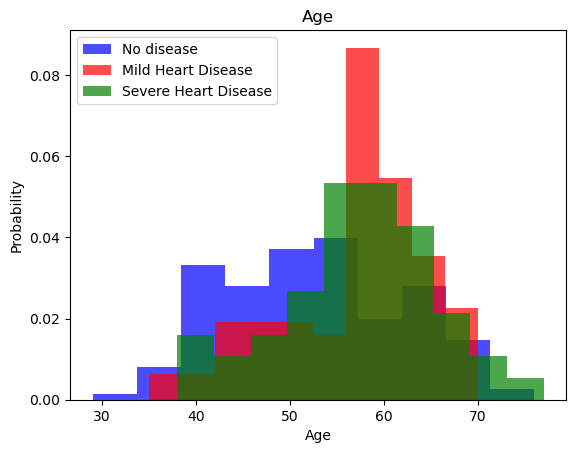

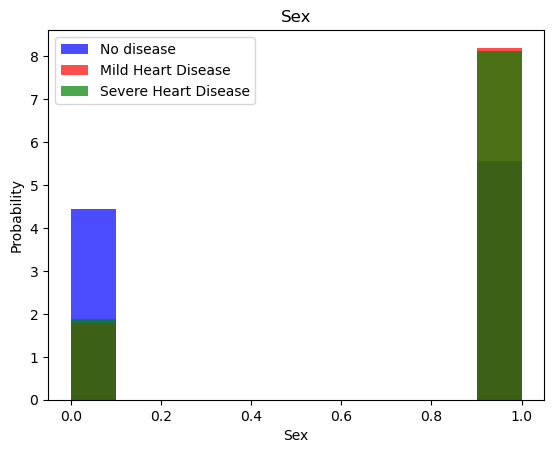

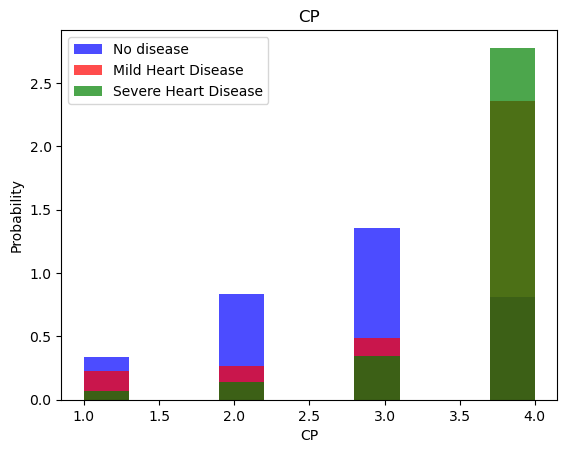

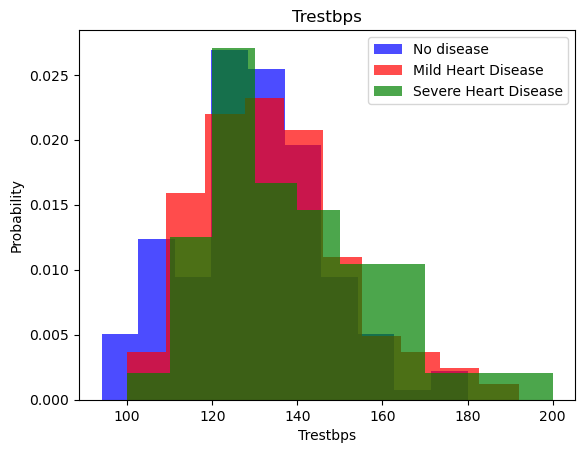

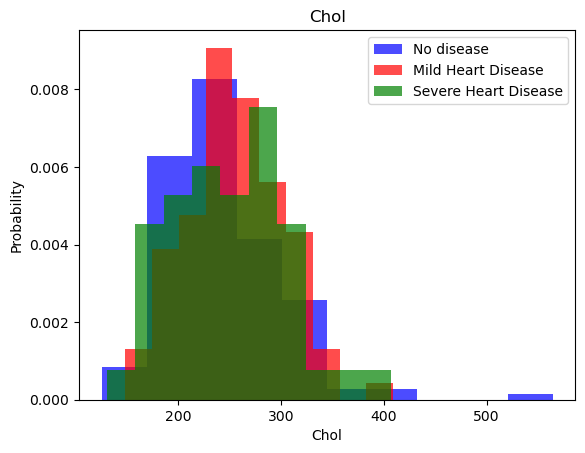

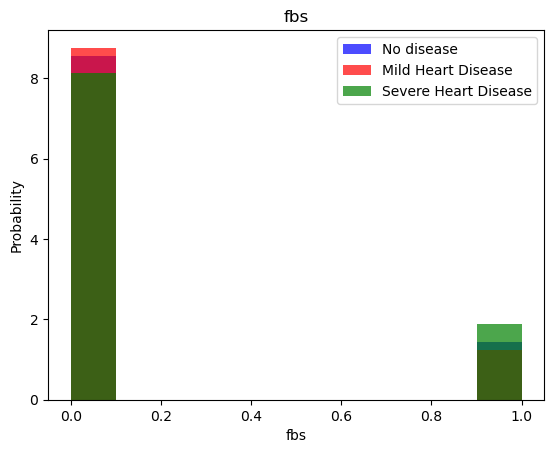

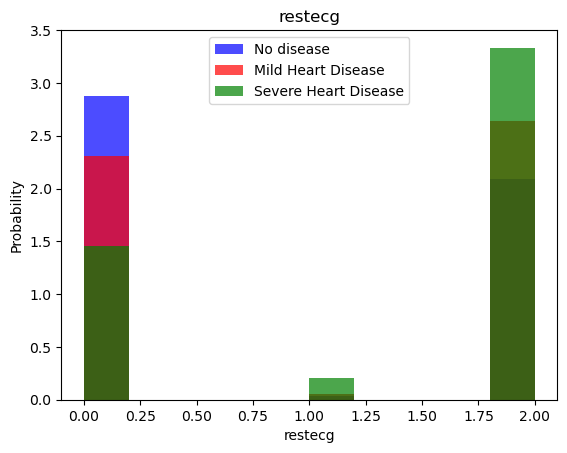

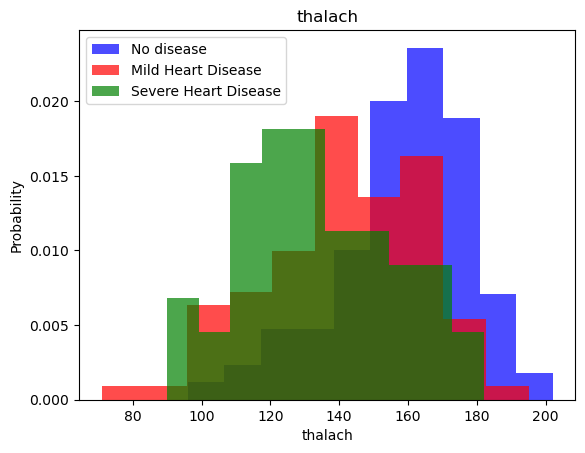

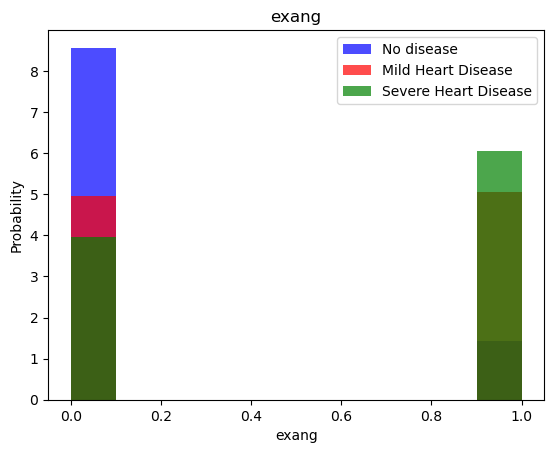

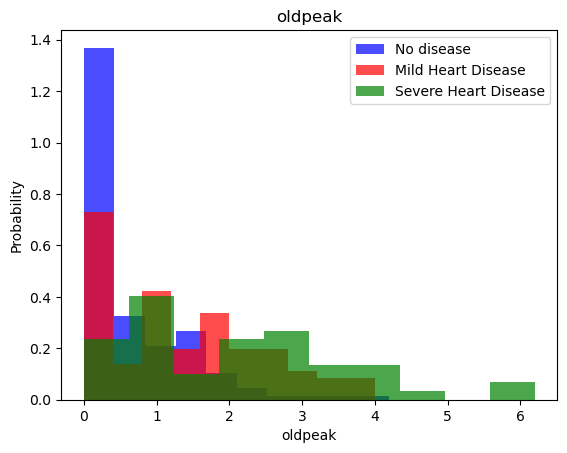

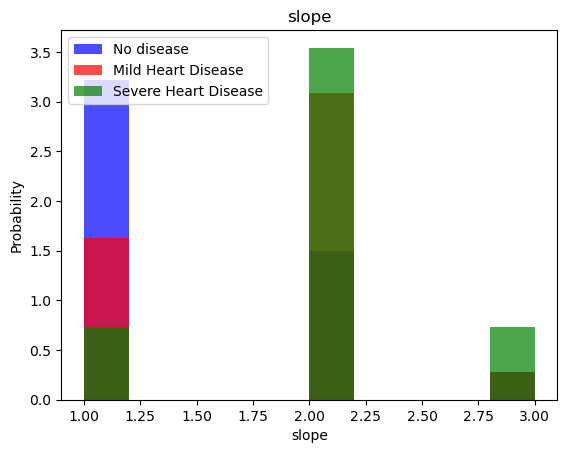

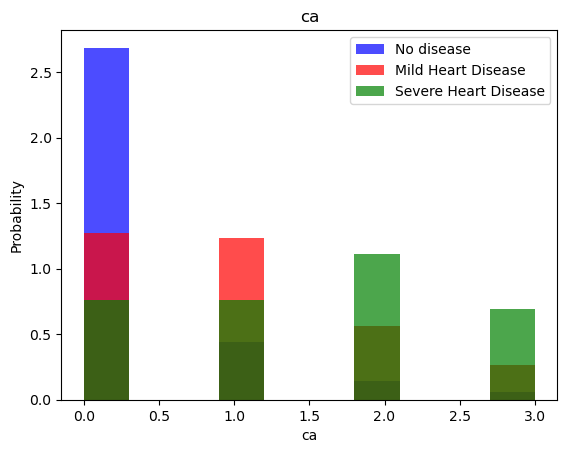

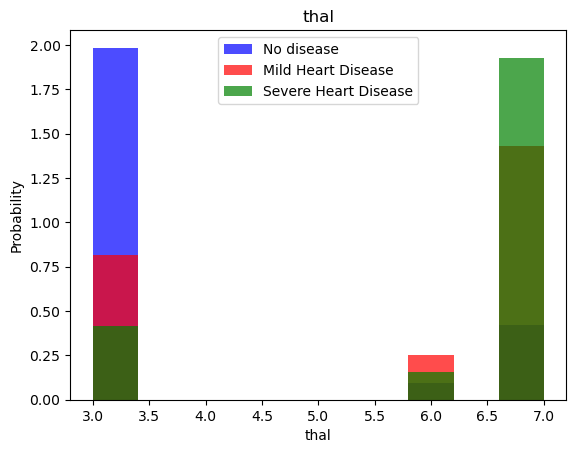

In [7]:

for label in cols[:-1]:
    plt.hist(heart_df[heart_df['target']==0][label], color='blue', label='No disease', alpha = 0.7, density = True)
    plt.hist(heart_df[heart_df['target']==1][label], color='red', label='Mild Heart Disease', alpha = 0.7, density = True)
    plt.hist(heart_df[heart_df['target']==2][label], color='green', label='Severe Heart Disease', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [8]:
# check the data statistics
heart_df.describe()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.622896
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.748341
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


In [9]:
# Check if we have null classes.
heart_df.isnull()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False,False,False,False,False
294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Scale the data features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

scaled = scaler.fit_transform(heart_df[scale_cols])
scaled

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.16666667, 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.70833333, 0.        , 1.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.625     , 1.        , 1.        , ..., 0.5       , 0.66666667,
        0.75      ],
       [0.58333333, 0.        , 1.        , ..., 0.5       , 0.        ,
        1.        ]])

In [19]:

y = heart_df['target'].to_numpy()
y

array([0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1], dtype=int6

In [22]:
r = np.corrcoef(scaled)
r

array([[ 1.        , -0.3118072 ,  0.20485045, ..., -0.43762868,
         0.44735677, -0.35499776],
       [-0.3118072 ,  1.        ,  0.02919162, ...,  0.38303531,
         0.20928593,  0.03756736],
       [ 0.20485045,  0.02919162,  1.        , ...,  0.16237068,
        -0.07238919, -0.05760417],
       ...,
       [-0.43762868,  0.38303531,  0.16237068, ...,  1.        ,
        -0.26824914,  0.73743736],
       [ 0.44735677,  0.20928593, -0.07238919, ..., -0.26824914,
         1.        , -0.1731799 ],
       [-0.35499776,  0.03756736, -0.05760417, ...,  0.73743736,
        -0.1731799 ,  1.        ]])

In [25]:
#plot correlation matrix.
corr = heart_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.210373
Sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.248591
CP,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.405773
Trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159274
Chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.057668
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.028376
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.193404
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.426599
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.409193
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.471619


#### We will pick the columns that have good correlation coefficient with our target. .0.4 . corr_cols = ['CP','thalach', 'exang', 'oldpeak', 'ca','thal']

In [120]:
# prepare dataset again
cor_cols = ['CP', 'thalach', 'exang', 'oldpeak', 'ca','thal']
min_df = heart_df[cor_cols]
min_df['target'] = heart_df['target']
min_df.head()

C:\Users\Jude\AppData\Local\Temp\ipykernel_15252\3348071895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_df['target'] = heart_df['target']


,CP,thalach,exang,oldpeak,ca,thal,target
0,1,150,0,2.3,0,6,0
1,4,108,1,1.5,3,3,1
2,3,187,0,3.5,0,3,0
3,2,172,0,1.4,0,3,0
4,2,178,0,0.8,0,3,0


In [121]:
min_df.describe()

,CP,thalach,exang,oldpeak,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,3.158249,149.599327,0.326599,1.055556,0.676768,4.730640,0.622896
std,0.964859,22.941562,0.469761,1.166123,0.938965,1.938629,0.748341
min,1.000000,71.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3.000000,133.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,3.000000,153.000000,0.000000,0.800000,0.000000,3.000000,0.000000
75%,4.000000,166.000000,1.000000,1.600000,1.000000,7.000000,1.000000
max,4.000000,202.000000,1.000000,6.200000,3.000000,7.000000,2.000000


In [122]:
# scale data using minmax

# define function that scales the data using min-max
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    
    #Equalize the normal of the classes in the dataset
    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    
    data = np.hstack((x,np.reshape(y,(-1,1))))
                     
    return data, x,y

In [123]:
#set training, validation and test set
train, valid, test = np.split(min_df.sample(frac=1), [int(0.6*len(min_df)), int(0.8*len(min_df))])

In [124]:
#split the dataset and oversample
#Use the above function to fix the mismatch in the data above then split the data
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=True)

# Model Creation

#### KNN Model

In [65]:
# import library
from sklearn import neighbors, metrics
from sklearn.metrics import f1_score, classification_report

In [66]:
#create a knn model
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
y_pred = clf_knn.predict(x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.35      0.38      0.36        16
           2       0.50      0.33      0.40         9

    accuracy                           0.62        60
   macro avg       0.54      0.50      0.51        60
weighted avg       0.61      0.62      0.61        60



#### Naive Bayes

In [69]:
#import library
from sklearn.naive_bayes import GaussianNB

In [70]:
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

GaussianNB()

In [71]:
y_pred = clf_nb.predict(x_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        35
           1       0.35      0.38      0.36        16
           2       0.44      0.78      0.56         9

    accuracy                           0.58        60
   macro avg       0.54      0.59      0.54        60
weighted avg       0.64      0.58      0.59        60



#### Logistic Regression

In [73]:
#import libraries
from sklearn.linear_model import LogisticRegression

In [74]:
#make classifier
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)

LogisticRegression()

In [75]:
y_pred = clf_log.predict(x_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.31      0.25      0.28        16
           2       0.40      0.67      0.50         9

    accuracy                           0.60        60
   macro avg       0.51      0.55      0.52        60
weighted avg       0.62      0.60      0.60        60



#### SVM 

In [77]:
#import libraries
from sklearn import svm

In [78]:
clf_svm = svm.SVC()
#fit data
clf_svm.fit(x_train,y_train)

SVC()

In [79]:
y_pred = clf_svm.predict(x_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.27      0.19      0.22        16
           2       0.38      0.67      0.48         9

    accuracy                           0.60        60
   macro avg       0.49      0.54      0.50        60
weighted avg       0.61      0.60      0.59        60



#### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
clf_dec = DecisionTreeClassifier(random_state=0)
#fit data
clf_dec.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [83]:
#make predictions
y_pred = clf_dec.predict(x_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62        35
           1       0.39      0.44      0.41        16
           2       0.31      0.44      0.36         9

    accuracy                           0.52        60
   macro avg       0.46      0.48      0.47        60
weighted avg       0.55      0.52      0.53        60



#### Neural Net Classifier

In [125]:
from sklearn.neural_network import MLPClassifier

In [129]:
clf_nn = MLPClassifier(solver='sgd', alpha=1e-5,
...                     hidden_layer_sizes=(10,3), activation = 'relu', learning_rate = 'adaptive')
clf_nn.fit(x_train, y_train)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), learning_rate='adaptive',
              solver='sgd')

In [130]:
pred = clf_nn.predict(x_test)

In [131]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        33
           1       0.48      0.30      0.37        33
           2       0.74      0.70      0.72        33

    accuracy                           0.66        99
   macro avg       0.63      0.66      0.63        99
weighted avg       0.63      0.66      0.63        99



# Fixing the data to be only two classes

In [132]:
heart_df.head()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [134]:
heart_df['target'].value_counts()

0    160
1     89
2     48
Name: target, dtype: int64

We can see that the number of classes are not balance. What we can do is to replace and transform the dataset to only two variables.

In [155]:
#import the dataset

new_df = pd.read_csv('./heart_dataset.csv')



In [156]:
new_df['target'].value_counts()

0    160
1     89
2     48
Name: target, dtype: int64

In [157]:
new_df.head()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [158]:
#conver target to str
new_df['target'] = new_df['target'].apply(str)

In [159]:
new_df.dtypes

Age           int64
Sex           int64
CP            int64
Trestbps      int64
Chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target       object
dtype: object

In [160]:
col_map = {'0':0, '1':1, '2':1}
new_df['target'] = new_df['target'].map(col_map)

In [162]:
new_df.head()

,Age,Sex,CP,Trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [163]:
new_df['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

In [164]:
#now convert the data type back to int
new_df['target'] = new_df['target'].apply(int)
new_df.dtypes

Age           int64
Sex           int64
CP            int64
Trestbps      int64
Chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Now that we have only two classes, we can now start with seperating the data and training the models with this data.

#### Data Splittting

In [165]:
#set training, validation and test set
train, valid, test = np.split(new_df.sample(frac=1), [int(0.6*len(new_df)), int(0.8*len(new_df))])

In [166]:
#split the dataset and oversample
#Use the above function to fix the mismatch in the data above then split the data
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# Model Creation

#### KNN Model

In [167]:
# import library
from sklearn import neighbors, metrics
from sklearn.metrics import f1_score, classification_report

In [168]:
#create a knn model
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [169]:
y_pred = clf_knn.predict(x_test)

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.65      0.74      0.69        23

    accuracy                           0.75        60
   macro avg       0.74      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60



#### Naiye Bayes

In [171]:
#import library
from sklearn.naive_bayes import GaussianNB

In [172]:
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

GaussianNB()

In [173]:
y_pred = clf_nb.predict(x_test)

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        37
           1       0.61      0.83      0.70        23

    accuracy                           0.73        60
   macro avg       0.74      0.75      0.73        60
weighted avg       0.77      0.73      0.74        60



#### Logistic Regression

In [175]:
#import libraries
from sklearn.linear_model import LogisticRegression

In [176]:
#make classifier
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)

LogisticRegression()

In [177]:
y_pred = clf_log.predict(x_test)

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.71      0.74      0.72        23

    accuracy                           0.78        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



#### SVM Classifier

In [179]:
#import libraries
from sklearn import svm

In [180]:
clf_svm = svm.SVC()
#fit data
clf_svm.fit(x_train,y_train)

SVC()

In [181]:
y_pred = clf_svm.predict(x_test)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.70      0.70      0.70        23

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



#### Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
clf_dec = DecisionTreeClassifier(random_state=0)
#fit data
clf_dec.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [185]:
#make predictions
y_pred = clf_dec.predict(x_test)

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        37
           1       0.59      1.00      0.74        23

    accuracy                           0.73        60
   macro avg       0.79      0.78      0.73        60
weighted avg       0.84      0.73      0.73        60



#### Neural Nets

In [187]:
from sklearn.neural_network import MLPClassifier

In [188]:
clf_nn = MLPClassifier()
clf_nn.fit(x_train, y_train)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [189]:
y_pred = clf_nn.predict(x_test)

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.64      0.78      0.71        23

    accuracy                           0.75        60
   macro avg       0.74      0.76      0.74        60
weighted avg       0.77      0.75      0.75        60

